In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from src.api_helpers import annotate_openai, clear_openai_cache
from openai import OpenAI

In [ ]:
data_id = "25.11.24_10cases"
n_test = 10

gt_paths = np.load(f"../data/finetuning/{data_id}/test.npy").tolist()
cf_paths = [i.replace("json", "txt") for i in gt_paths]

In [ ]:
score_4omini = np.zeros((n_test, 5, 3))
for i, cf_path in enumerate(cf_paths):
    print(f"Case: {i}")
    preds, score = annotate_openai(cf_path, model='gpt-4o-mini-2024-07-18')
    score_4omini[i] = score

Case: 0
Case: 1
Case: 2
Case: 3
Case: 4
Case: 5
Case: 6
Case: 7
Case: 8
Case: 9


In [20]:
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [21]:
ft_10cases_old = client.fine_tuning.jobs.retrieve("ftjob-MPAzFIA7MYTt2PItQVsUKgGu").fine_tuned_model

In [ ]:
clear_openai_cache()
score_ft_10cases_old = np.zeros((n_test, 5, 3))
for i, cf_path in enumerate(cf_paths):
    print(f"Case: {i}")
    preds, score = annotate_openai(cf_path, model=ft_10cases_old)
    score_ft_10cases_old[i] = score

Cache Clear
Case: 0
Case: 1
Case: 2
Case: 3

Attempt 1 failed: 'Relevant Precedents'
Case: 4
Case: 5
Case: 6
Case: 7
Case: 8
Case: 9


In [22]:
ft_50cases = client.fine_tuning.jobs.retrieve("ftjob-3GvZY4fjcMbPwEcZE6Zp6Co6").fine_tuned_model

In [23]:
client.fine_tuning.jobs.retrieve("ftjob-3GvZY4fjcMbPwEcZE6Zp6Co6").trained_tokens

1890585

In [33]:
clear_openai_cache()
score_ft_50cases = np.zeros((n_test, 5, 3))
for i, cf_path in enumerate(cf_paths):
    print(f"Case: {i}")
    preds, score = annotate_openai(cf_path, model=ft_50cases)
    score_ft_50cases[i] = score

Cache Clear
Case: 0
Case: 1
Case: 2
Case: 3
Case: 4
Case: 5
Case: 6
Case: 7
Case: 8
Case: 9


In [21]:
ft_100cases = client.fine_tuning.jobs.retrieve("ftjob-eboXhRujBQFOLpe4ImYLrzNH").fine_tuned_model

In [52]:
clear_openai_cache()
score_ft_100cases = np.zeros((n_test, 5, 3))
for i, cf_path in enumerate(cf_paths):
    print(f"Case: {i}")
    preds, score = annotate_openai(cf_path, model=ft_100cases)
    score_ft_100cases[i] = score

Cache Clear
Case: 0
Case: 1
Case: 2
Case: 3
Case: 4
Case: 5
Case: 6
Case: 7
Case: 8
Case: 9


In [41]:
score_4o = np.zeros((n_test, 5, 3))
for i, cf_path in enumerate(cf_paths):
    print(f"Case: {i}")
    preds, score = annotate_openai(cf_path, model='gpt-4o-2024-08-06')
    score_4o[i] = score

Case: 0
Case: 1
Case: 2
Case: 3
Case: 4
Case: 5
Case: 6
Case: 7
Case: 8
Case: 9


In [ ]:
scores = np.array([score_4o, score_4omini, score_ft_10cases_old, score_ft_50cases])

In [58]:
np.save("../data/results/finetuning_on_gpt-4o-mini_new_results.npy", scores)

In [ ]:
scores = np.load("../data/results/finetuning_on_gpt-4o-mini_new_results.npy")

In [25]:
scores.shape

(4, 10, 5, 3)

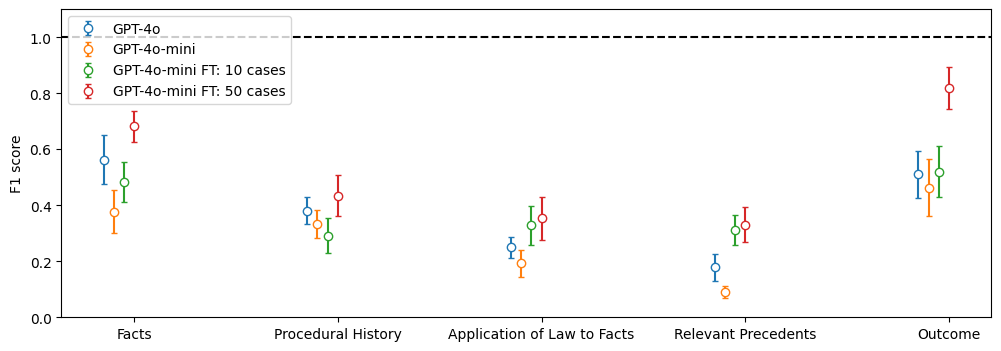

In [ ]:
x_axis_labels = ['Facts', 'Procedural History', 'Application of Law to Facts', 'Relevant Precedents', 'Outcome']
labels = ['GPT-4o', 'GPT-4o-mini', 'GPT-4o-mini FT: 10 cases', 'GPT-4o-mini FT: 50 cases']
fig = plt.figure(figsize=(12, 4))

for i in range(scores.shape[0]):
    f1_mean = np.mean(scores[i, :, :, 2], axis=(0))
    f1_std = np.std(scores[i, :, :, 2], axis=(0), ddof=1) / np.sqrt(n_test)
    x_axis = [k-0.1+i*0.05 for k in range(5)] 
    plt.errorbar(x_axis, f1_mean, yerr=f1_std, fmt='o', markerfacecolor='white', capsize=2, label=f"{labels[i]}")

plt.axhline(1, color='black', linestyle='dashed')
xticks = np.arange(0, 5)
fig.axes[0].set_xticks(x_axis, labels=x_axis_labels)

plt.ylabel("F1 score")
plt.ylim([0, 1.1])
# plt.title(f"Testing Finetuning: ({n_test} cases each)")
plt.legend(loc='best')
# plt.savefig("../figures/finetuning_on_gpt-4o-mini_new_results.png", bbox_inches='tight', dpi=300)
plt.show()

In [30]:
scores.shape

(4, 10, 5, 3)

In [36]:
gpt_4o_mini_base_mean = np.mean(scores[1, :, :, 2], axis=(0, 1))
gpt_4o_mini_base_std = np.std(scores[1, :, :, 2], axis=(0,1), ddof=1) / np.sqrt(n_test * 5)

In [37]:
gpt_4o_mini_ft50_mean = np.mean(scores[3, :, :, 2], axis=(0, 1))
gpt_4o_mini_ft50_std = np.std(scores[3, :, :, 2], axis=(0,1), ddof=1) / np.sqrt(n_test * 5)

In [38]:
gpt_4o_base_mean = np.mean(scores[0, :, :, 2], axis=(0, 1))
gpt_4o_base_std = np.std(scores[0, :, :, 2], axis=(0,1), ddof=1) / np.sqrt(n_test * 5)

In [39]:
print(f"gpt_4o_mini_base: {gpt_4o_mini_base_mean:.2f} ({gpt_4o_mini_base_std:.3f})")
print(f"gpt_4o_mini_ft50: {gpt_4o_mini_ft50_mean:.2f} ({gpt_4o_mini_ft50_std:.3f})")
print(f"gpt_4o_base: {gpt_4o_base_mean:.2f} ({gpt_4o_base_std:.3f})")

gpt_4o_mini_base: 0.29 (0.034)
gpt_4o_mini_ft50: 0.52 (0.041)
gpt_4o_base: 0.38 (0.035)
